In [1]:
import numpy as np
from scipy.special import iv
import matplotlib.pyplot as plt

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 23,
          'axes.titlesize': 23,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize':5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

In [3]:
def cmpt_bunch_length_correction_factor(sigma_phi, phase_noise = True):
    '''
    This function computes the correction factor, C, due to the bunch length, sigma_phi, assuming a 2D gaussian longitudinal distribution.
    - phase_noise = True (False): computes C for phase (amplitude) noise case
    - sigma_phi: in radians at the CC frequency
    
    - Io, I2l: Modified Bessel functions of the first kind. 
    - I2l: It converges to zero for larger orders. Therefore, a summation up to a large integer, here 10000 is used,  gives us trustworthy resutls.
    
    Note: Possibility to compute the factors for a pillbox distribution which is the other extreme (email from Themis). 
    '''

    if phase_noise:
        Io = iv(0, sigma_phi**2) # The first argument is the order
        I2l_sum = 0
        for order in range(2, 10000, 2):
            I2l_sum = I2l_sum + iv(order, sigma_phi**2)
         
        C = np.exp(-sigma_phi**2)*(Io+2*I2l_sum)
        
    else:
        I2ll_sum = 0
        for order in range(0, 10000, 2):
            I2ll_sum = I2ll_sum + iv(order+1, sigma_phi**2)
        
        C = np.exp(-sigma_phi**2)*I2ll_sum
        
    return C

In [4]:
def bunch_length_m_to_rad(L, clight, f_RF):
    phi = L*(2*np.pi*f_RF)/clight
    return phi

In [8]:
clight = 299792458 # light speed in meters/second
f_RF = 400.789e6 # CC frequency in Hz
z_list = np.linspace(0, 0.19, 100) # rms bunch length in meters
phase_noise = False

In [9]:
C_list = []
sigma_phi_list = []
for z in z_list[1:]: # skip the first element as bunch length zero doesn't exist
    sigma_phi = bunch_length_m_to_rad(z, clight, f_RF)
    my_C = cmpt_bunch_length_correction_factor(sigma_phi, phase_noise)
    
    sigma_phi_list.append(sigma_phi)
    C_list.append(my_C)

In [10]:
# rms bunch length during SPS CC tests
sigma_z = 0.155 # m
sigma_phi = bunch_length_m_to_rad(sigma_z, clight, 400.789e6)
print(sigma_phi)
C = cmpt_bunch_length_correction_factor(sigma_phi, phase_noise)
print(C)

1.3019870272796386
0.24157569921889774


#### A) Plot dependence in meters

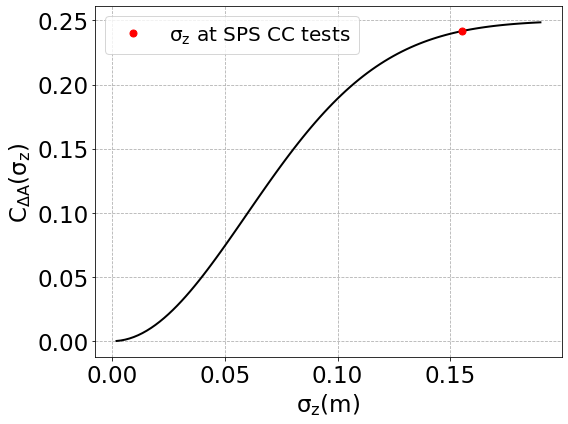

In [11]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(z_list[1:], C_list, c='k')
ax1.plot(sigma_z, C, 'o',color='r', markersize=7, label=r'$\rm \sigma_z$' +' at SPS CC tests')
if phase_noise:
    ax1.set_ylabel(r'$\rm C_{\Delta \phi} (\sigma_z) $')
else:
    ax1.set_ylabel(r'$\rm C_{\Delta A} (\sigma_z) $')
ax1.set_xlabel(r'$\rm \sigma_z(m)$')
ax1.grid(linestyle='--')
ax1.legend()
plt.tight_layout()
plt.savefig('Correction_factor_bunch_length_sigmaZ_PN{}.png'.format(phase_noise))

#### B) Plot dependence in radians

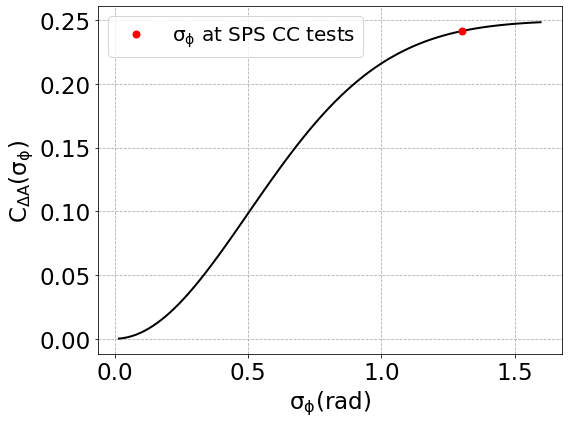

In [12]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(sigma_phi_list, C_list, c='k')
ax1.plot(sigma_phi, C, 'o',color='r', markersize=7, label=r'$\rm \sigma_ \phi$' +' at SPS CC tests')
if phase_noise:
    ax1.set_ylabel(r'$\rm C_{\Delta \phi} (\sigma_ \phi) $')
else:
    ax1.set_ylabel(r'$\rm C_{\Delta A} (\sigma_\phi) $')
ax1.set_xlabel(r'$\rm \sigma_ \phi(rad)$')
ax1.grid(linestyle='--')
ax1.legend()
plt.tight_layout()
plt.savefig('Correction_factor_bunch_length_sigmaPhi_PN{}.png'.format(phase_noise))